In [12]:
from models import Net
from utils import train, test, plot_images
import torch
from torch import nn

import torch.optim as optim
from torchinfo import summary
from torchvision import datasets, transforms

In [5]:
mps = torch.backends.mps.is_available()
cuda = torch.cuda.is_available()
device = "cpu"
if cuda:
    device = torch.device("cuda")
elif mps:
    device = torch.device("mps")

device

device(type='mps')

In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(11), ], p=0.4),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [7]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [8]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 0, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

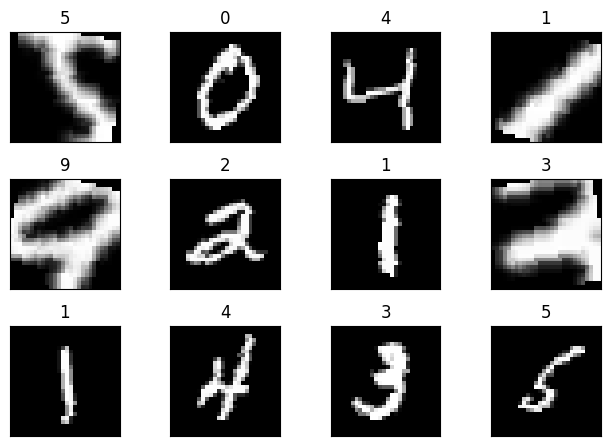

In [9]:
plot_images(train_loader)

In [10]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Conv2d: 1-1                            [32, 26, 26]              320
├─Conv2d: 1-2                            [64, 24, 24]              18,496
├─Conv2d: 1-3                            [128, 10, 10]             73,856
├─Conv2d: 1-4                            [256, 8, 8]               295,168
├─AdaptiveAvgPool2d: 1-5                 [256, 1, 1]               --
├─Linear: 1-6                            [1, 50]                   12,850
├─Linear: 1-7                            [1, 10]                   510
Total params: 401,200
Trainable params: 401,200
Non-trainable params: 0
Total mult-adds (M): 727.73
Input size (MB): 0.00
Forward/backward pass size (MB): 0.70
Params size (MB): 1.60
Estimated Total Size (MB): 2.31

In [13]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.3762 Batch_id=937 Accuracy=49.17: 100%|██████████| 938/938 [00:20<00:00, 45.66it/s]


Test set: Average loss: 0.0056, Accuracy: 8822/10000 (88.22%)

Epoch 2


Train: Loss=0.2396 Batch_id=937 Accuracy=84.84: 100%|██████████| 938/938 [00:15<00:00, 59.19it/s]


Test set: Average loss: 0.0033, Accuracy: 9319/10000 (93.19%)

Epoch 3


Train: Loss=0.0821 Batch_id=937 Accuracy=90.20: 100%|██████████| 938/938 [00:17<00:00, 54.99it/s]


Test set: Average loss: 0.0012, Accuracy: 9768/10000 (97.68%)

Epoch 4


Train: Loss=0.1266 Batch_id=937 Accuracy=91.98: 100%|██████████| 938/938 [00:17<00:00, 55.11it/s]


Test set: Average loss: 0.0011, Accuracy: 9752/10000 (97.52%)

Epoch 5


Train: Loss=0.0848 Batch_id=937 Accuracy=93.23: 100%|██████████| 938/938 [00:16<00:00, 55.41it/s]


Test set: Average loss: 0.0012, Accuracy: 9747/10000 (97.47%)

Epoch 6


Train: Loss=0.1442 Batch_id=937 Accuracy=93.65: 100%|██████████| 938/938 [00:16<00:00, 58.28it/s]


Test set: Average loss: 0.0009, Accuracy: 9819/10000 (98.19%)

Epoch 7


Train: Loss=0.1165 Batch_id=937 Accuracy=94.25: 100%|██████████| 938/938 [00:16<00:00, 57.59it/s]


Test set: Average loss: 0.0017, Accuracy: 9652/10000 (96.52%)

Epoch 8


Train: Loss=0.1534 Batch_id=937 Accuracy=94.68: 100%|██████████| 938/938 [00:17<00:00, 53.19it/s]


Test set: Average loss: 0.0008, Accuracy: 9838/10000 (98.38%)

Epoch 9


Train: Loss=0.0814 Batch_id=937 Accuracy=95.03: 100%|██████████| 938/938 [00:16<00:00, 57.45it/s]


Test set: Average loss: 0.0008, Accuracy: 9847/10000 (98.47%)

Epoch 10


Train: Loss=0.0642 Batch_id=937 Accuracy=95.23: 100%|██████████| 938/938 [00:16<00:00, 55.55it/s]


Test set: Average loss: 0.0005, Accuracy: 9897/10000 (98.97%)

Epoch 11


Train: Loss=0.0420 Batch_id=937 Accuracy=95.47: 100%|██████████| 938/938 [00:15<00:00, 58.93it/s]


Test set: Average loss: 0.0005, Accuracy: 9895/10000 (98.95%)

Epoch 12


Train: Loss=0.1163 Batch_id=937 Accuracy=95.59: 100%|██████████| 938/938 [00:16<00:00, 58.49it/s]


Test set: Average loss: 0.0006, Accuracy: 9868/10000 (98.68%)

Epoch 13


Train: Loss=0.0324 Batch_id=937 Accuracy=95.81: 100%|██████████| 938/938 [00:15<00:00, 59.33it/s]


Test set: Average loss: 0.0006, Accuracy: 9872/10000 (98.72%)

Epoch 14


Train: Loss=0.0180 Batch_id=937 Accuracy=95.90: 100%|██████████| 938/938 [00:15<00:00, 59.27it/s]


Test set: Average loss: 0.0004, Accuracy: 9902/10000 (99.02%)

Epoch 15


Train: Loss=0.0320 Batch_id=937 Accuracy=96.09: 100%|██████████| 938/938 [00:15<00:00, 59.25it/s]


Test set: Average loss: 0.0004, Accuracy: 9903/10000 (99.03%)

Epoch 16


Train: Loss=0.0108 Batch_id=937 Accuracy=96.77: 100%|██████████| 938/938 [00:15<00:00, 59.03it/s]


Test set: Average loss: 0.0003, Accuracy: 9926/10000 (99.26%)

Epoch 17


Train: Loss=0.0090 Batch_id=937 Accuracy=96.95: 100%|██████████| 938/938 [00:15<00:00, 59.42it/s]


Test set: Average loss: 0.0003, Accuracy: 9919/10000 (99.19%)

Epoch 18


Train: Loss=0.0252 Batch_id=937 Accuracy=97.03: 100%|██████████| 938/938 [00:15<00:00, 58.83it/s]


Test set: Average loss: 0.0003, Accuracy: 9928/10000 (99.28%)

Epoch 19


Train: Loss=0.0107 Batch_id=937 Accuracy=96.91: 100%|██████████| 938/938 [00:16<00:00, 58.56it/s]


Test set: Average loss: 0.0003, Accuracy: 9923/10000 (99.23%)

Epoch 20


Train: Loss=0.0387 Batch_id=937 Accuracy=96.89: 100%|██████████| 938/938 [00:15<00:00, 58.75it/s]


Test set: Average loss: 0.0003, Accuracy: 9924/10000 (99.24%)

